In [ ]:
%pip install openai tiktoken pandas scikit-learn matplotlib --upgrade --quiet

# Introduction to Vector Embeddings

In this notebook, we’ll cover the theory behind text embeddings, show you how to generate and use them with the OpenAI API, and then give you a hands-on exercise to try embedding search yourself.

## Theory: What Are Embeddings?
- An embedding is a high‑dimensional vector that captures the semantic meaning of text.
- Similar pieces of text have vectors that are close together in vector space (cosine similarity, dot product).
- Common use cases: search, clustering, recommendation, anomaly detection, classification.

## Getting Started: Install & Import
Make sure you have the OpenAI and tiktoken packages installed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from openai import OpenAI
from sklearn.decomposition import PCA
import tiktoken

## 1. Generate an Embedding
Use `text-embedding-3-small` to turn text into a 1536‑dimensional vector.

In [2]:
# Initialize the client
# Note: In a real application, you would use an environment variable or secure method
# to store your API key. This is just for demonstration.
client = OpenAI(
    # Replace with your actual API key or use: api_key=os.environ.get("OPENAI_API_KEY")
    api_key="YOUR_API_KEY_HERE"
)


In [3]:
def get_embedding(text, model='text-embedding-3-small'):
    text_clean = text.replace('\n', ' ')
    resp = client.embeddings.create(input=[text_clean], model=model)
    return np.array(resp.data[0].embedding)

sample = 'The quick brown fox jumps over the lazy dog.'
emb = get_embedding(sample)
print(f'Vector length: {len(emb)}')
print('First 5 dims:', emb[:5])

Vector length: 1536
First 5 dims: [-0.01842354 -0.00725776  0.00366694 -0.05420479 -0.0227249 ]


## 2. Count Tokens Before Embedding
Use `tiktoken` to estimate input size and control cost.

In [4]:
def num_tokens_from_string(s: str, encoding_name: str = 'cl100k_base') -> int:
    enc = tiktoken.get_encoding(encoding_name)
    return len(enc.encode(s))

print('Sample token count:', num_tokens_from_string(sample))

Sample token count: 10


## 3. Dimensionality Reduction & Visualization
Project a few sentence embeddings down to 2D with PCA.

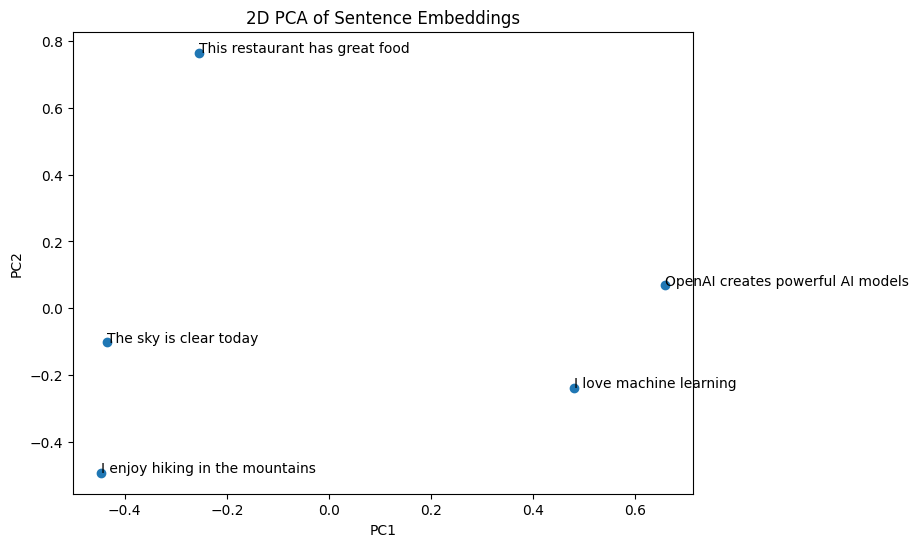

In [5]:
sentences = [
    'I love machine learning',
    'OpenAI creates powerful AI models',
    'The sky is clear today',
    'I enjoy hiking in the mountains',
    'This restaurant has great food'
]
vectors = np.vstack([get_embedding(s) for s in sentences])

pca = PCA(n_components=2)
points = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
plt.scatter(points[:,0], points[:,1])
for i, txt in enumerate(sentences):
    plt.annotate(txt, (points[i,0], points[i,1]))
plt.title('2D PCA of Sentence Embeddings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

---

## Exercise for You
1. Pick 5 of your own short sentences.
2. Embed them using the `get_embedding` function.
3. Compute pairwise cosine similarities and identify the two most similar sentences.
4. (Bonus) Visualize them in 2D with PCA as above.

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
# similarity = cosine_similarity(vectors)

In [12]:
# cosine_similarity(vectors[0].reshape(1, -1), vectors[1].reshape(1, -1))

array([[0.46990101]])